In [102]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
import os

In [84]:
sns.set_palette("Set2")
sns.set_context(context="paper", font_scale=2)

mpl.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "font.serif": "Computer Modern Roman",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "font.size": 22,
    }
)
use_pgf = True
plt.rcParams["text.usetex"] = True
hatches=['x',"o","/","\\"]
palette={'sarima':'C1','lstm_cpu':'C2','cnn1d_cpu':'C3'}

In [85]:
df_latency=pd.read_csv("latency-benchmark.csv",index_col=0)
df_latency.head()

,target_model,inference_latency_ns,predicted_value,real_value
0,cnn1d_cpu,143199491,0.140374,0.169014
1,cnn1d_cpu,33777522,0.128045,0.042254
2,cnn1d_cpu,32219422,0.100450,0.028169
3,cnn1d_cpu,31995758,0.091924,0.105634
4,cnn1d_cpu,32394776,0.152301,0.063380


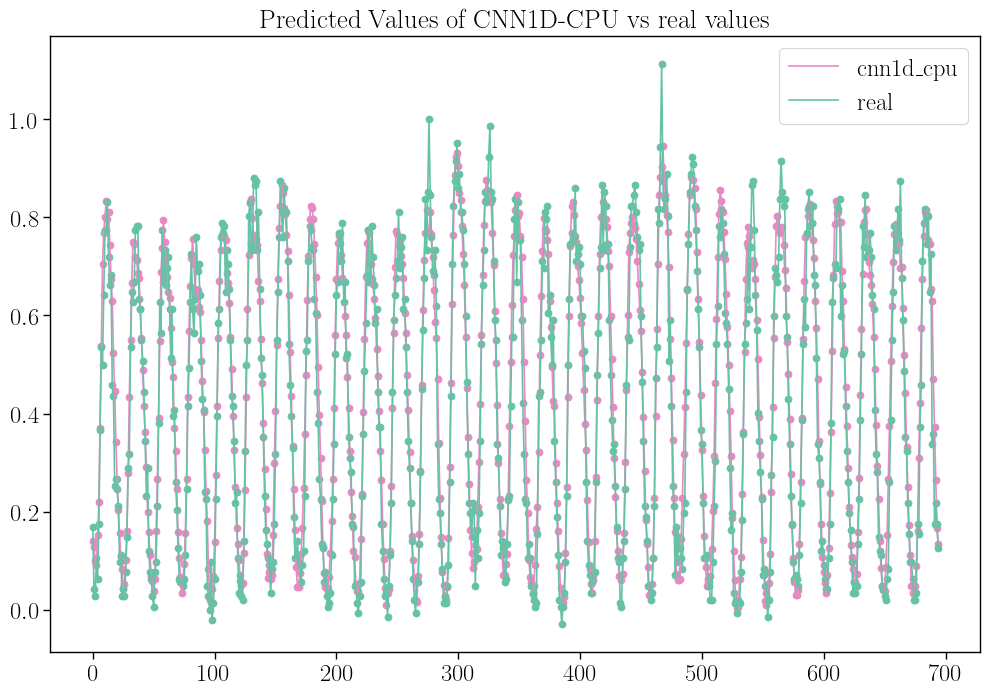

mse: 0.004639251637620562


In [86]:
n_oss_cnn1d=len(df_latency[df_latency["target_model"]=="cnn1d_cpu"])

fig=plt.figure(figsize=(12,8))
plt.title("Predicted Values of CNN1D-CPU vs real values")

plt.plot(np.arange(0,n_oss_cnn1d,1),df_latency[df_latency["target_model"]=="cnn1d_cpu"]["predicted_value"],label="cnn1d_cpu",color="C3")
plt.plot(np.arange(0,n_oss_cnn1d,1),df_latency[df_latency["target_model"]=="cnn1d_cpu"]["real_value"],label="real",color="C0")

plt.scatter(np.arange(0,n_oss_cnn1d,1),df_latency[df_latency["target_model"]=="cnn1d_cpu"]["predicted_value"],color="C3")
plt.scatter(np.arange(0,n_oss_cnn1d,1),df_latency[df_latency["target_model"]=="cnn1d_cpu"]["real_value"],color="C0")

plt.legend()
plt.show()

fig.savefig(os.path.join('..','__readme-imgs__','cnn1d-cpu-acc-1.pdf'), format='pdf')
fig.savefig(os.path.join('..','__readme-imgs__','cnn1d-cpu-acc-1.png'), format='png', dpi=150)

print(f"mse: {mean_squared_error(df_latency[df_latency["target_model"]=="cnn1d_cpu"]["real_value"]
                                ,df_latency[df_latency["target_model"]=="cnn1d_cpu"]["predicted_value"],)}")

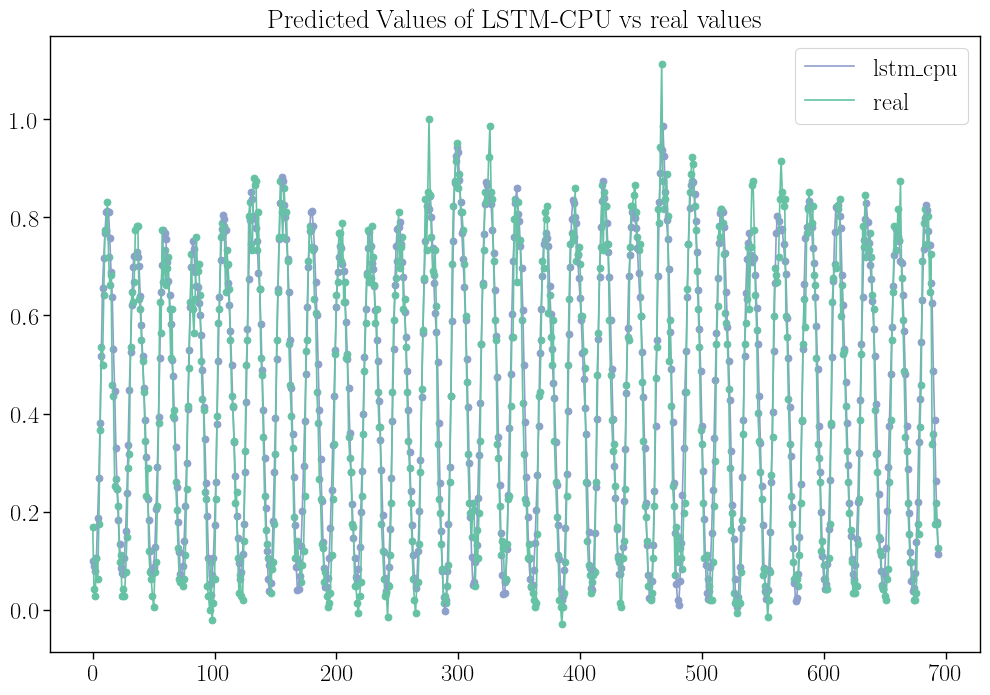

mse: 0.005496672467580562


In [87]:
n_oss_lstm=len(df_latency[df_latency["target_model"]=="lstm_cpu"])

fig=plt.figure(figsize=(12,8))
plt.title("Predicted Values of LSTM-CPU vs real values")

plt.plot(np.arange(0,n_oss_lstm,1),df_latency[df_latency["target_model"]=="lstm_cpu"]["predicted_value"],label="lstm_cpu",color="C2")
plt.plot(np.arange(0,n_oss_lstm,1),df_latency[df_latency["target_model"]=="lstm_cpu"]["real_value"],label="real",color="C0")

plt.scatter(np.arange(0,n_oss_lstm,1),df_latency[df_latency["target_model"]=="lstm_cpu"]["predicted_value"],color="C2")
plt.scatter(np.arange(0,n_oss_lstm,1),df_latency[df_latency["target_model"]=="lstm_cpu"]["real_value"],color="C0")

plt.legend()
plt.show()

fig.savefig(os.path.join('..','__readme-imgs__','lstm-cpu-acc-1.pdf'), format='pdf')
fig.savefig(os.path.join('..','__readme-imgs__','lstm-cpu-acc-1.png'), format='png', dpi=150)

print(f"mse: {mean_squared_error(df_latency[df_latency["target_model"]=="lstm_cpu"]["real_value"]
                                ,df_latency[df_latency["target_model"]=="lstm_cpu"]["predicted_value"],)}")

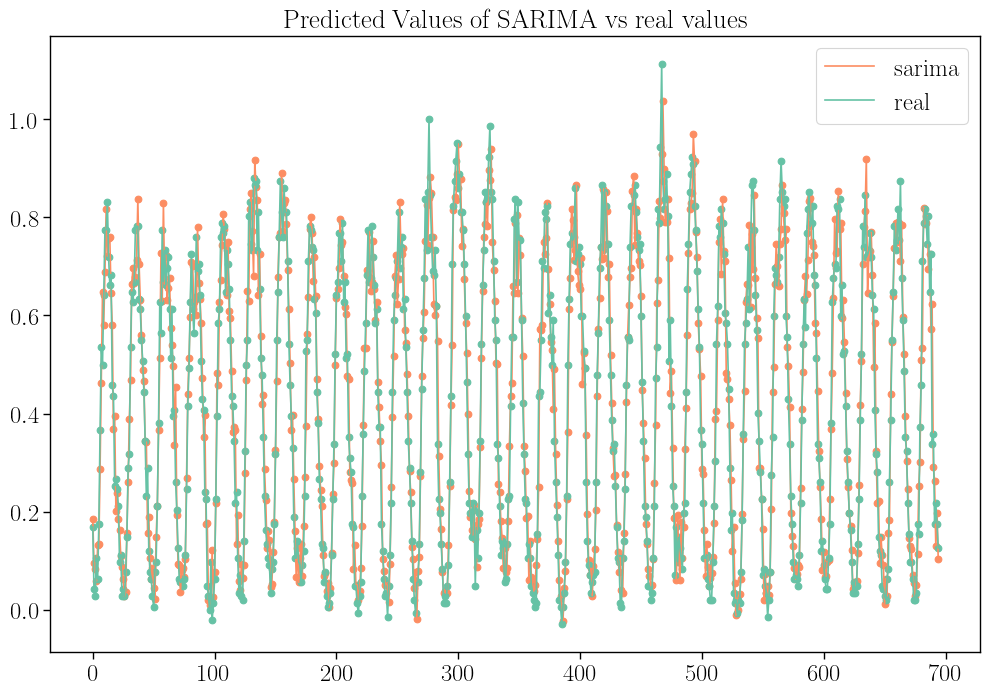

mse: 0.0049292171969406075


In [88]:
n_oss_sarima=len(df_latency[df_latency["target_model"]=="sarima"])

fig=plt.figure(figsize=(12,8))
plt.title("Predicted Values of SARIMA vs real values")

plt.plot(np.arange(0,n_oss_sarima,1),df_latency[df_latency["target_model"]=="sarima"]["predicted_value"],label="sarima",color="C1")
plt.plot(np.arange(0,n_oss_sarima,1),df_latency[df_latency["target_model"]=="sarima"]["real_value"],label="real",color="C0")

plt.scatter(np.arange(0,n_oss_sarima,1),df_latency[df_latency["target_model"]=="sarima"]["predicted_value"],color="C1")
plt.scatter(np.arange(0,n_oss_sarima,1),df_latency[df_latency["target_model"]=="sarima"]["real_value"],color="C0")

plt.legend()
plt.show()

fig.savefig(os.path.join('..','__readme-imgs__','sarima-acc-1.pdf'), format='pdf')
fig.savefig(os.path.join('..','__readme-imgs__','sarima-acc-1.png'), format='png', dpi=150)

print(f"mse: {mean_squared_error(df_latency[df_latency["target_model"]=="sarima"]["real_value"]
                                ,df_latency[df_latency["target_model"]=="sarima"]["predicted_value"],)}")

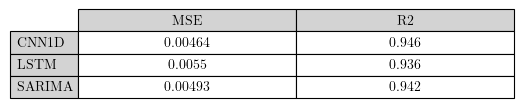

In [103]:
col_labels=["MSE","R2"]
row_labels=["CNN1D","LSTM","SARIMA"]
cell_text=list(map(lambda r:list(map(lambda c:f"{c:.3g}",r)),[[
    mean_squared_error(df_latency[df_latency["target_model"]=="cnn1d_cpu"]["real_value"],df_latency[df_latency["target_model"]=="cnn1d_cpu"]["predicted_value"]),
    r2_score(df_latency[df_latency["target_model"]=="cnn1d_cpu"]["real_value"],df_latency[df_latency["target_model"]=="cnn1d_cpu"]["predicted_value"])
    ],[
    mean_squared_error(df_latency[df_latency["target_model"]=="lstm_cpu"]["real_value"],df_latency[df_latency["target_model"]=="lstm_cpu"]["predicted_value"]),
    r2_score(df_latency[df_latency["target_model"]=="lstm_cpu"]["real_value"],df_latency[df_latency["target_model"]=="lstm_cpu"]["predicted_value"]),

    ],[
    mean_squared_error(df_latency[df_latency["target_model"]=="sarima"]["real_value"],df_latency[df_latency["target_model"]=="sarima"]["predicted_value"]),
    r2_score(df_latency[df_latency["target_model"]=="sarima"]["real_value"],df_latency[df_latency["target_model"]=="sarima"]["predicted_value"]),
    
    ]]))

fig,ax=plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
table=ax.table(cellText=cell_text,
         cellLoc="center",
         colLabels=col_labels,
         colColours=["lightgray","lightgray"],
         rowLabels=row_labels,
         rowColours=["lightgray","lightgray","lightgray"],
         loc="center")

cell_dict = table.get_celld()
for i in range(len(row_labels)+1):
    for j in range(len(col_labels)):
        if i >0 : 
            cell_dict[(i, -1)].set_height(0.5)
        cell_dict[(i, j)].set_height(0.5)  # Set first row height
fig.tight_layout()
table.set_fontsize(10)
table.scale(1,1)
plt.show()

fig.savefig(os.path.join('..','__readme-imgs__','indexes-table.pdf'), format='pdf')
fig.savefig(os.path.join('..','__readme-imgs__','indexes-table.png'), format='png', dpi=150)

/tmp/ipykernel_30126/740469943.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


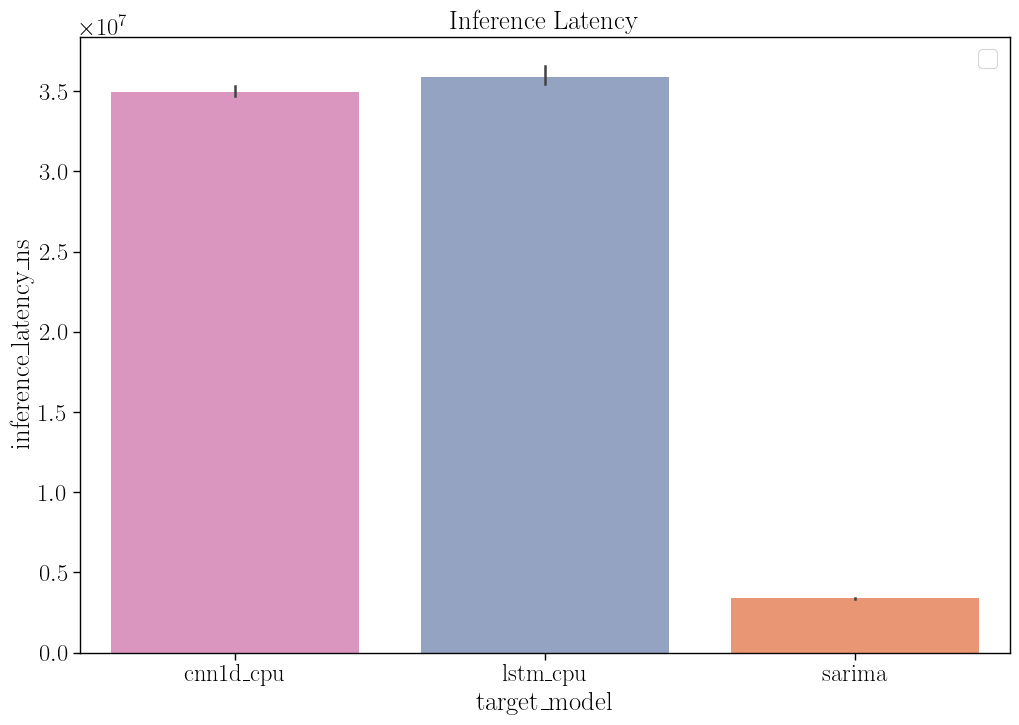

In [89]:
fig=plt.figure(figsize=(12,8))
plt.title("Inference Latency")

sns.barplot(df_latency,x="target_model",y="inference_latency_ns",hue="target_model",palette=palette)
plt.legend()
plt.show()

fig.savefig(os.path.join('..','__readme-imgs__','latency-comparison.pdf'), format='pdf')
fig.savefig(os.path.join('..','__readme-imgs__','latency-comparison.png'), format='png', dpi=150)

In [97]:
from datetime import datetime,date,time

df_res=pd.read_csv("resource-benchmark.csv")
df_res["time"]=df_res["time"].apply(lambda t:datetime.strptime(t,"%M:%S"))
df_res=df_res[df_res["time"]>=datetime.strptime("00:10","%M:%S")]

<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_30126/2378104426.py:2: SyntaxWarning: invalid escape sequence '\%'
  plt.title("\%CPU utilization")


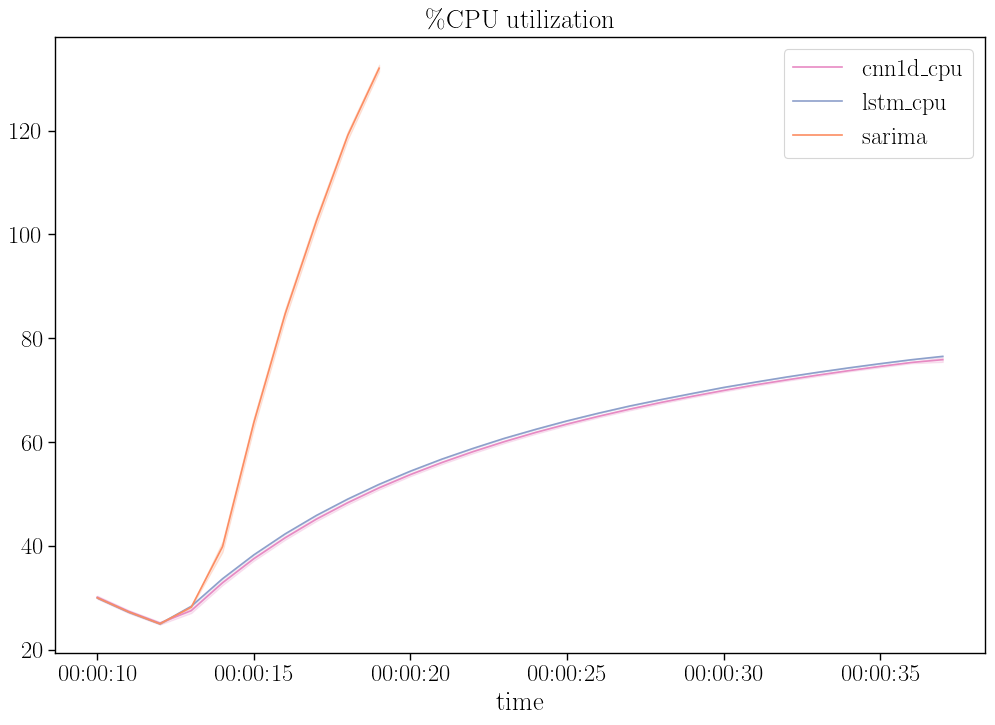

In [99]:
fig=plt.figure(figsize=(12,8))
plt.title("\%CPU utilization")
sns.lineplot(x="time",y="%cpu",hue="target_model",data=df_res,err_style="band",palette=palette)


plt.legend()
plt.show()

fig.savefig(os.path.join('..','__readme-imgs__','cpu-utilization-comparison.pdf'), format='pdf')
fig.savefig(os.path.join('..','__readme-imgs__','cpu-utilization-comparison.png'), format='png', dpi=150)

<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_30126/3322282161.py:2: SyntaxWarning: invalid escape sequence '\%'
  plt.title("\%MEM utilization")


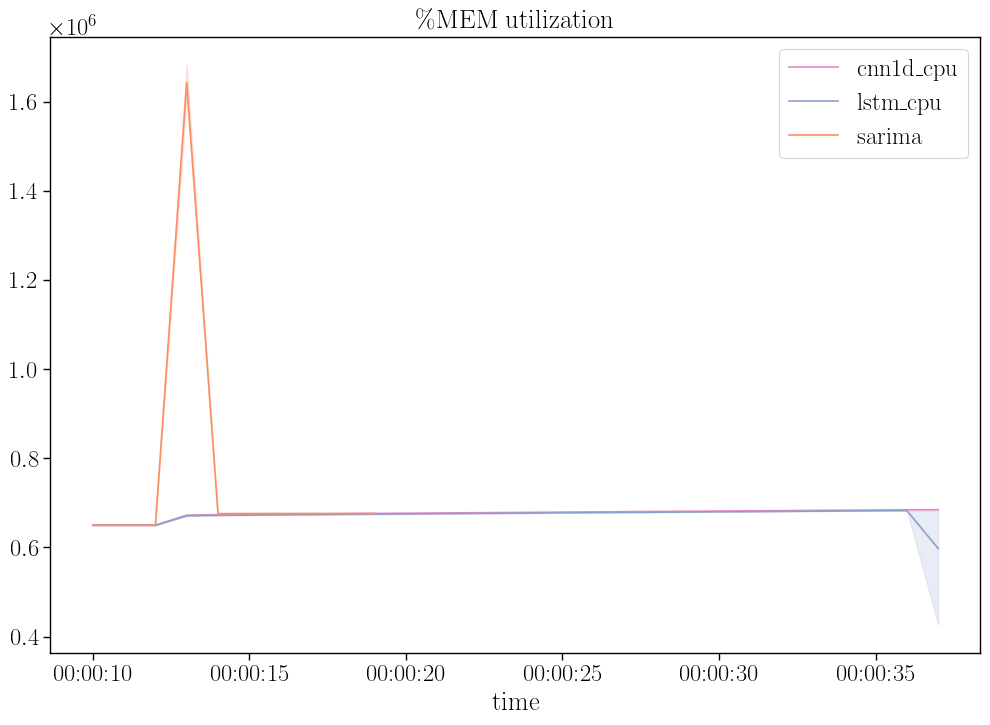

In [100]:
fig=plt.figure(figsize=(12,8))
plt.title("\%MEM utilization")

sns.lineplot(x="time",y="%mem",hue="target_model",data=df_res,err_style="band",palette=palette)

plt.legend()
plt.show()

fig.savefig(os.path.join('..','__readme-imgs__','mem-utilization-comparison.pdf'), format='pdf')
fig.savefig(os.path.join('..','__readme-imgs__','mem-utilization-comparison.png'), format='png', dpi=150)
